In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

# g = 3795506
# pov_id = 914
# df_teams = api.teams(game_id=g)
# df_players = api.players(game_id=g)
# df_events = api.events(game_id=g, load_360=True)

# teams = list(df_events['team_name'].unique())
# teams_id = list(df_events['team_id'].unique())

# df = df_events[(df_events['period_id'] < 5)]
# df = df[df['possession_team_id'] == df['team_id']]
# df = df[['team_id', 'location']]
# df = df.dropna().reset_index(drop=True)

In [3]:
import pandas as pd

# TODO: REMOVE CORNERS

games = api.games(competition_id=55, season_id=43)
pov_id = 772
games = games[(games["home_team_id"] == pov_id) | (games["away_team_id"] == pov_id)].game_id.unique()

final = pd.DataFrame({})

for g in games:
    df_teams = api.teams(game_id=g)
    df_players = api.players(game_id=g)
    df_events = api.events(game_id=g, load_360=True)

    teams = list(df_events['team_name'].unique())
    teams_id = list(df_events['team_id'].unique())

    df = df_events[(df_events['period_id'] < 5)]
    df = df[df['possession_team_id'] == df['team_id']]
    df = df[['team_id', 'location']]
    df = df.dropna().reset_index(drop=True)
    final = pd.concat([final, df], ignore_index=True)
    print(len(final))

len(final)

4223
8240
11161
15237
18405
21462


21462

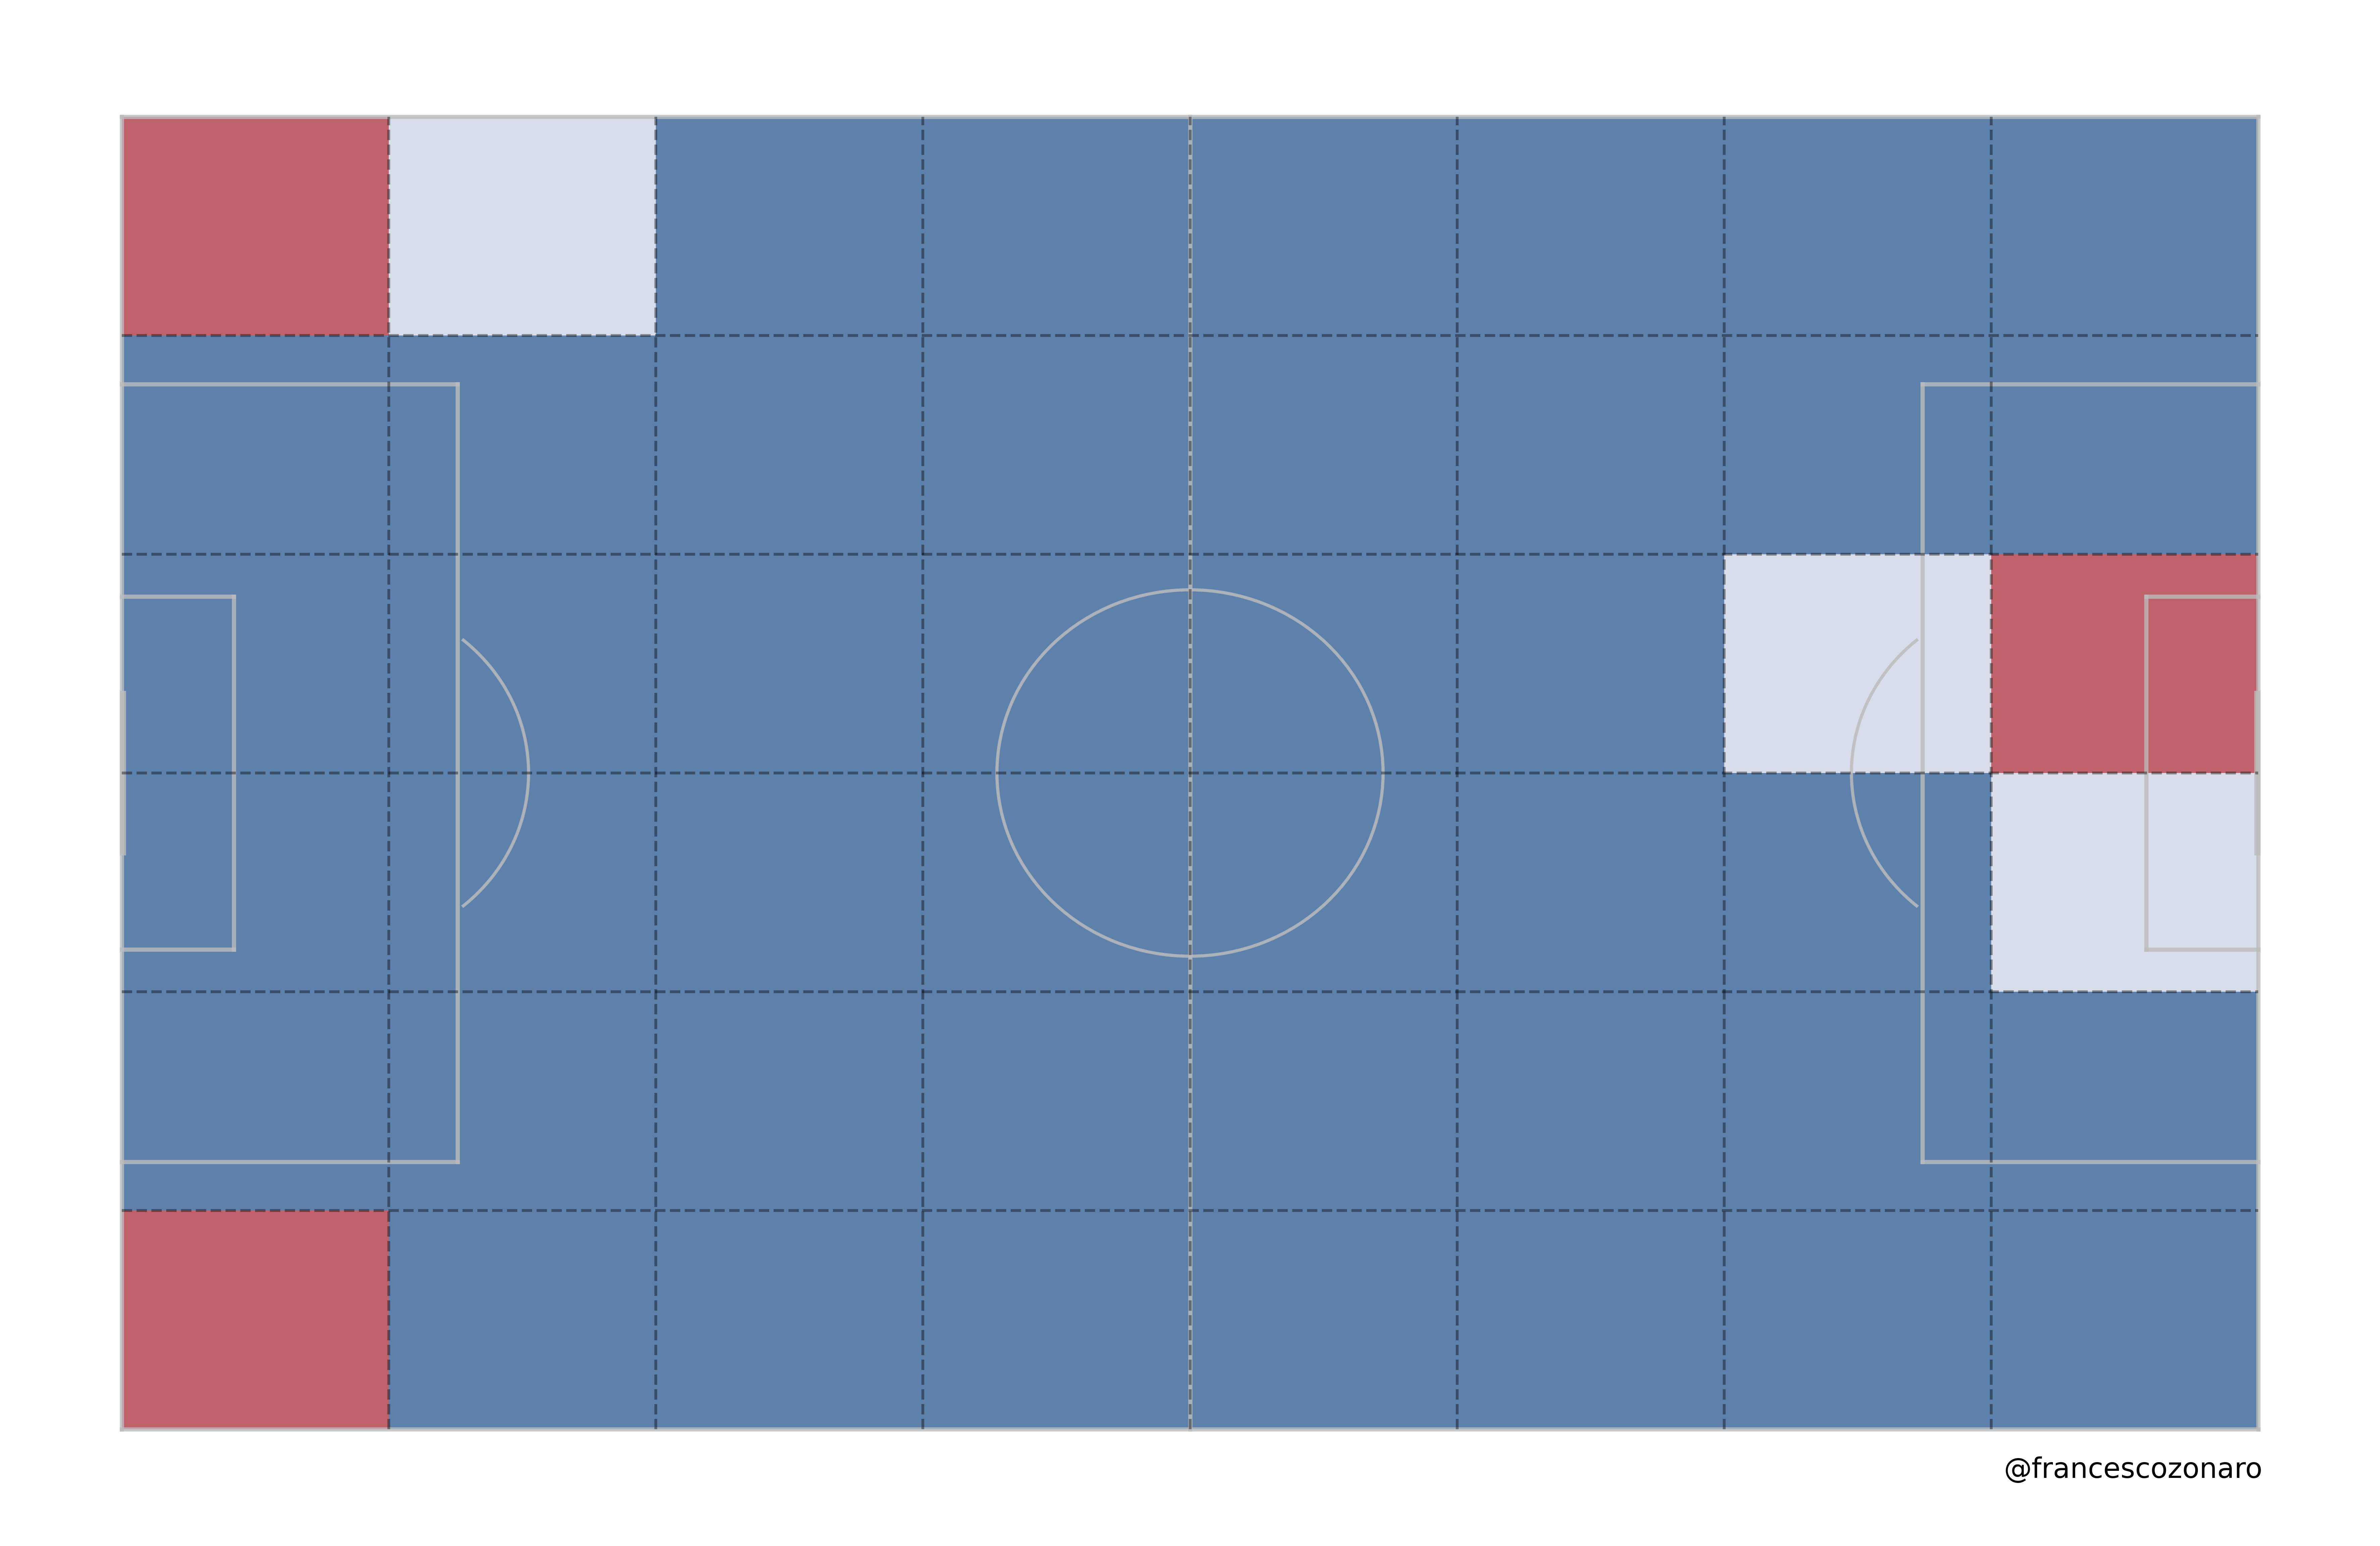

In [4]:
import statsbombplot as sbp

sbp.events.draw_control_zones(final, "control_zones", pov_id)